Data source - https://www.football-data.co.uk/

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df_01 = pd.read_csv('../data/LigaMX/mex-primera-division-2023-2024-apertura.csv')


# Join the two seasons together

df = pd.concat([df_01,
                #df_23,
                #df_22,
                #df_21
                     ], ignore_index=True)
df

,Unnamed: 0,date,time,torneo,team_home,team_away,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away
0,0,01.07.2023,03:00,apertura,CF América,FC Juárez,1:2 (1:0),1.0,2.0,1.0,0.0
1,1,NaN,03:00,apertura,Mazatlán FC,CF Pachuca,1:1 (0:1),1.0,1.0,0.0,1.0
2,2,NaN,05:10,apertura,Club Tijuana,Pumas UNAM,2:3 (1:1),2.0,3.0,1.0,1.0
3,3,02.07.2023,01:00,apertura,Atlético San Luis,CF Monterrey,1:1 (0:1),1.0,1.0,0.0,1.0
4,4,NaN,03:00,apertura,UANL Tigres,Puebla FC,1:1 (0:0),1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,148,NaN,00:00,apertura,Gallos Blancos,CF Monterrey,0:0 (0:0),0.0,0.0,0.0,0.0
149,149,NaN,02:00,apertura,Pumas UNAM,Deportivo Guadalajara,1:0 (1:0),1.0,0.0,1.0,0.0
150,150,NaN,04:10,apertura,UANL Tigres,CF América,0:0 (0:0),0.0,0.0,0.0,0.0
151,151,13.11.2023,01:00,apertura,Cruz Azul,Puebla FC,1:2 (1:1),1.0,2.0,1.0,1.0


# Selecting only match related columns. 

- Match Statistics (where available)
- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards
- HBP = Home Team Bookings Points (10 = yellow, 25 = red)
- ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [887]:
# Create new rows that we will want to use later for future predictions.
new_rows = {
    'HomeTeam':['Brentford', 'Man City', 'Liverpool', 'Newcastle', 'Chelsea', 'Aston Villa'],
    'AwayTeam':['Man United', 'Arsenal', 'Brighton','West Ham', 'Burnley', 'Wolves'],
    'Year' : [2024]*6,
    'Month' : [3]*6,
    'Day' : [30, 31, 31, 30, 30, 30],
    'Hour': [20, 16, 14, 12, 15, 25],
    'Min':[00, 30, 00, 30, 00, 00]
}

In [42]:
def split_date_day(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split('.')[0]
    else:
        return np.nan  # Return NaN if x is not a string

def split_date_month(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 1< len(x):
            return x.split('.')[1]
    else:
        return np.nan  # Return NaN if x is not a string

def split_date_year(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 2 < len(x):
            return x.split('.')[2]
    else:
        return np.nan  # Return NaN if x is not a string
    
def split_date_hour(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split(':')[0]
    else:
        return np.nan  # Return NaN if x is not a string
    
def split_date_min(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 1< len(x):
           return x.split(':')[1]
    else:
        return np.nan  # Return NaN if x is not a string

0       01
1      NaN
2      NaN
3       02
4      NaN
      ... 
148    NaN
149    NaN
150    NaN
151     13
152    NaN
Name: date, Length: 153, dtype: object

In [43]:
df = df[df.columns[:11]].copy()
#df.loc[:,'date'] = (df['date'].apply(lambda x:x.split('.')[0])).astype(int)
df.loc[:,'date']  = df['date'].apply(split_date_day)
df.loc[:,'time'] = (df['date'].apply(split_date_month))
df.loc[:,'year'] = (df['date'].apply(split_date_year))
df.loc[:,'hour'] = (df['time'].apply(split_date_hour))
df.loc[:,'min'] = (df['time'].apply(split_date_min))
df = df.drop(columns = ['Date', 'Time'])
df = pd.concat([pd.DataFrame(new_rows), df], ignore_index=True)
df = df.sort_values(by= ['year', 'month', 'day', 'hour']).reset_index(drop = True)
df

IndexError: list index out of range

In [889]:
df['HomeTeam'].value_counts().sort_index()

Arsenal             14
Aston Villa         15
Bournemouth         14
Brentford           15
Brighton            14
Burnley             15
Chelsea             14
Crystal Palace      14
Everton             14
Fulham              15
Liverpool           15
Luton               15
Man City            15
Man United          14
Newcastle           15
Nott'm Forest       14
Sheffield United    14
Tottenham           14
West Ham            15
Wolves              14
Name: HomeTeam, dtype: int64

In [890]:
df.sort_values(by= ['Year', 'Month', 'Day', 'Hour', 'Min'])

,HomeTeam,AwayTeam,Year,Month,Day,Hour,Min,Div,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Burnley,Man City,2023,8,11,20,0,E0,0.0,3.0,A,0.0,2.0,A,C Pawson,6.0,17.0,1.0,8.0,11.0,8.0,6.0,5.0,0.0,0.0,1.0,0.0
1,Arsenal,Nott'm Forest,2023,8,12,12,30,E0,2.0,1.0,H,2.0,0.0,H,M Oliver,15.0,6.0,7.0,2.0,12.0,12.0,8.0,3.0,2.0,2.0,0.0,0.0
2,Bournemouth,West Ham,2023,8,12,15,0,E0,1.0,1.0,D,0.0,0.0,D,P Bankes,14.0,16.0,5.0,3.0,9.0,14.0,10.0,4.0,1.0,4.0,0.0,0.0
3,Brighton,Luton,2023,8,12,15,0,E0,4.0,1.0,H,1.0,0.0,H,D Coote,27.0,9.0,12.0,3.0,11.0,12.0,6.0,7.0,2.0,2.0,0.0,0.0
4,Everton,Fulham,2023,8,12,15,0,E0,0.0,1.0,A,0.0,0.0,D,S Attwell,19.0,9.0,9.0,2.0,12.0,6.0,10.0,4.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Chelsea,Burnley,2024,3,30,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Brentford,Man United,2024,3,30,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Aston Villa,Wolves,2024,3,30,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Liverpool,Brighton,2024,3,31,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [891]:
# first part we need:
# 1. A row for each match, from the pespective of both the home and away team.
# 2. A column called team_playing
# 3. A column for opponent

df['team_playing'] = df['HomeTeam']
df['opponent'] = df['AwayTeam']

df2 = df.copy()
df2['team_playing'] = df2['AwayTeam']
df2['opponent'] = df2['HomeTeam']

In [892]:
# we need:
# Columns describing:
# 1. What the team_playing did. We will use these columns to compute rolling statistics of the team playing.
# 2. Columns describing what the opponent did? Yes because does that represent the team_playing, and how oppositions have done against them right?
#  

df = df[['team_playing', 'opponent', 'HomeTeam', 'AwayTeam', 'FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 
        'Day', 'Month', 'Year', 'Hour',
        'FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'FTR', 'Referee']]

df2 = df2[['team_playing', 'opponent','HomeTeam', 'AwayTeam','FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 
            'Day', 'Month', 'Year', 'Hour',
            'FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'FTR', 'Referee']]


# We have two datasets. Each containing a team_playing column. df is when the team_playing is the home team and df2 is when 
# the team playing is the away team.

# We need to convert these column names from home and way to team_playing stats and opponent stats.

In [893]:
# First we change the home team. So we need to rename the columns that represent the home teams to say TP for team playing.


df = df.rename(columns = {'FTHG':'FT_TP_G', # goals for the team playing
            'HTHG':'HT_TP_G', 
            'HS':'TP_S', 
            'HST':'TP_ST', 
            'HF':'TP_F',
            'HC': 'TP_C',
            'HY':'TP_Y', 
            'HR':'TP_R',
            'FTAG':'FT_OP_G', 
            'HTAG':'HT_OP_G', 
            'AS':'OP_S', 
            'AST':'OP_ST', 
            'AF':'OP_F',
            'AC': 'OP_C',
            'AY':'OP_Y', 
            'AR':'OP_R'})
df

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,TP_Y,TP_R,Day,Month,Year,Hour,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,11,8,2023,20,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson
1,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,12,8,2023,12,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver
2,Bournemouth,West Ham,Bournemouth,West Ham,1.0,0.0,14.0,5.0,9.0,10.0,1.0,0.0,12,8,2023,15,1.0,0.0,16.0,3.0,14.0,4.0,4.0,0.0,D,P Bankes
3,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,12,8,2023,15,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote
4,Everton,Fulham,Everton,Fulham,0.0,0.0,19.0,9.0,12.0,10.0,0.0,0.0,12,8,2023,15,1.0,0.0,9.0,2.0,6.0,4.0,2.0,0.0,A,S Attwell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Chelsea,Burnley,Chelsea,Burnley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Brentford,Man United,Brentford,Man United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Aston Villa,Wolves,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [894]:
df2 = df2.rename(columns = {'FTHG':'FT_OP_G',  # 
            'HTHG':'HT_OP_G', 
            'HS':'OP_S', 
            'HST':'OP_ST', 
            'HF':'OP_F',
            'HC': 'OP_C',
            'HY':'OP_Y', 
            'HR':'OP_R',
            'FTAG':'FT_TP_G', 
            'HTAG':'HT_TP_G', 
            'AS':'TP_S', 
            'AST':'TP_ST', 
            'AF':'TP_F',
            'AC': 'TP_C',
            'AY':'TP_Y', 
            'AR':'TP_R'})

df2

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,TP_Y,TP_R,Day,Month,Year,Hour,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,11,8,2023,20,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson
1,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,12,8,2023,12,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver
2,West Ham,Bournemouth,Bournemouth,West Ham,1.0,0.0,16.0,3.0,14.0,4.0,4.0,0.0,12,8,2023,15,1.0,0.0,14.0,5.0,9.0,10.0,1.0,0.0,D,P Bankes
3,Luton,Brighton,Brighton,Luton,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,12,8,2023,15,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,H,D Coote
4,Fulham,Everton,Everton,Fulham,1.0,0.0,9.0,2.0,6.0,4.0,2.0,0.0,12,8,2023,15,0.0,0.0,19.0,9.0,12.0,10.0,0.0,0.0,A,S Attwell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Burnley,Chelsea,Chelsea,Burnley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Man United,Brentford,Brentford,Man United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [895]:
df_final = pd.concat([df, df2], ignore_index=True)
df_final = df_final.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)
df_final

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,TP_Y,TP_R,Day,Month,Year,Hour,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,11,8,2023,20,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,11,8,2023,20,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,12,8,2023,12,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,12,8,2023,12,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,12,8,2023,15,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,Man City,Arsenal,Man City,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [896]:
# create is_home feature.

df_final['is_home'] = (df_final['team_playing'] == df_final['HomeTeam']).astype(int)
df_final

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,TP_Y,TP_R,Day,Month,Year,Hour,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee,is_home
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,11,8,2023,20,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson,1
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,11,8,2023,20,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson,0
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,12,8,2023,12,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver,1
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,12,8,2023,12,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver,0
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,12,8,2023,15,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,3,2024,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
574,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
575,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
576,Man City,Arsenal,Man City,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,3,2024,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [897]:
# rename the columns. 

rename_columns = {
    'FT_TP_G': 'team_playing_ft_goals',  # Full-Time Goals by Team Playing
    'HT_TP_G': 'team_playing_ht_goals',  # Half-Time Goals by Team Playing
    'TP_S': 'team_playing_total_shots',  # Total Shots by Team Playing
    'TP_ST': 'team_playing_shots_on_target',  # Shots on Target by Team Playing
    'TP_F': 'team_playing_fouls_committed',  # Fouls Committed by Team Playing
    'TP_C': 'team_playing_corners_won',  # Corners Won by Team Playing
    'TP_Y': 'team_playing_yellow_cards',  # Yellow Cards Received by Team Playing
    'TP_R': 'team_playing_red_cards',  # Red Cards Received by Team Playing
    'FT_OP_G': 'opponent_ft_goals',  # Full-Time Goals by Opponent (Goals Conceded by Team Playing)
    'HT_OP_G': 'opponent_ht_goals',  # Half-Time Goals by Opponent
    'OP_S': 'opponent_total_shots',  # Total Shots by Opponent
    'OP_ST': 'opponent_shots_on_target',  # Shots on Target by Opponent
    'OP_F': 'opponent_fouls_committed',  # Fouls Committed by Opponent (Fouls Won by Team Playing)
    'OP_C': 'opponent_corners_won',  # Corners Won by Opponent
    'OP_Y': 'opponent_yellow_cards',  # Yellow Cards Received by Opponent
    'OP_R': 'opponent_red_cards',  # Red Cards Received by Opponent
}



df_final = df_final.rename(columns=rename_columns)#.drop(columns = ['opponent_yellow_cards', 'opponent_red_cards', 'team_playing_yellow_cards', 'team_playing_red_cards', 'opponent_ht_goals', 'team_playing_ht_goals'])

In [898]:
# Now we need to create a binary target column that tells us if the team_playing won the match.

df_final['target'] = ((((df_final['is_home']==1) & (df_final['FTR']=='H')) | ((df_final['is_home']==0) & (df_final['FTR']=='A')))).astype(int)
df_final.head(7)

,team_playing,opponent,HomeTeam,AwayTeam,team_playing_ft_goals,team_playing_ht_goals,team_playing_total_shots,team_playing_shots_on_target,team_playing_fouls_committed,team_playing_corners_won,team_playing_yellow_cards,team_playing_red_cards,Day,Month,Year,Hour,opponent_ft_goals,opponent_ht_goals,opponent_total_shots,opponent_shots_on_target,opponent_fouls_committed,opponent_corners_won,opponent_yellow_cards,opponent_red_cards,FTR,Referee,is_home,target
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,11,8,2023,20,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson,1,0
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,11,8,2023,20,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson,0,1
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,12,8,2023,12,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver,1,1
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,12,8,2023,12,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver,0,0
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,12,8,2023,15,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote,1,1
5,Luton,Brighton,Brighton,Luton,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,12,8,2023,15,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,H,D Coote,0,0
6,Sheffield United,Crystal Palace,Sheffield United,Crystal Palace,0.0,0.0,8.0,1.0,18.0,5.0,3.0,0.0,12,8,2023,15,1.0,0.0,24.0,8.0,11.0,5.0,0.0,0.0,A,J Brooks,1,0


In [899]:
# adding in the matches for future predictions. the matches that havnt happened yet.
# just a few matches. 

# Feature Engineering

Calculating Rolling Statistics. We want to calculate rolling stats. At the moment, these features are telling us what happened during each particular match. When making predictions we wont know these stats. We want to be able to use what happened in the past to predict future games.

In [900]:
df_grouped = df_final.groupby('team_playing')

#df_final.drop(columns = ['AwayTeam', 'FTR', 'HomeTeam', 'Referee', 'opponent', 'team_playing', 'Day', 'Month', 'Year']).rolling(window = 3, closed = 'left').mean()

# We grouped the data by team_playing. Now we can calculate rolling stats for each team respectivly. 
# We will exclude non numeric columns and time columns.

In [901]:
cols_to_drop = ['AwayTeam', 'FTR', 'HomeTeam', 'Referee', 'opponent', 'team_playing', 'Day', 'Month', 'Year', 'Hour', 'is_home']

window = 5
data = []

for name, group in df_grouped:
    print(name)
    group.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True, inplace=True)
    mean_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').mean().add_suffix('_rolling_mean')
    sum_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').sum().add_suffix('_rolling_sum')
    
    std_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').std().add_suffix('_rolling_std')
    min_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').min().add_suffix('_rolling_min')
    max_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').max().add_suffix('_rolling_max')
    median_ = group.drop(columns=cols_to_drop).rolling(window=window, closed='left').median().add_suffix('_rolling_median')
    
    

    d = pd.concat([group[['team_playing', 'opponent', 'is_home', 'target', 'Year', 'Month', 'Day', 'Hour', 'Referee']], 
                   mean_,                
                    #sum_, 
                   # std_, 
                    #min_, 
                    #max_, 
                   #median_, 
                   ], axis = 1).bfill()
    data.append(d)

Arsenal
Aston Villa
Bournemouth
Brentford
Brighton
Burnley
Chelsea
Crystal Palace
Everton
Fulham
Liverpool
Luton


Man City
Man United
Newcastle
Nott'm Forest
Sheffield United
Tottenham
West Ham
Wolves


In [902]:
# creating a top 6 binary feature to indicate if the team_playing or opponent is considered top 6 team.
final_data = pd.concat(data).sort_index()
#top_6 = ['Arsenal', 'Liverpool', 'Man City', 'Man United', 'Chelsea', 'Tottenham']
#final_data['TP_top6'] = final_data['team_playing'].apply(lambda x:1 if x in top_6 else 0)
#final_data['OP_top6'] = final_data['opponent'].apply(lambda x:1 if x in top_6 else 0)


In [903]:
final_data['Date'] = pd.to_datetime(final_data[['Year', 'Month', 'Day', 'Hour']])
final_data.sort_values(by = ['Date', 'Referee'], inplace = True)

In [904]:
final_data = final_data.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)

In [905]:
final_data.shape

(578, 27)

In [906]:
train_df = final_data[final_data['Date']<=pd.Timestamp('2024-03-01')]
test_df = final_data[(final_data['Date'] > pd.Timestamp('2024-03-01')) & (final_data['Date'] <= pd.Timestamp('2024-03-29'))]
future_prediction = final_data[final_data['Date']>=pd.Timestamp('2024-03-20')]

print(train_df.shape)
print(test_df.shape)
print(future_prediction.shape)
# I am going t

(516, 27)
(50, 27)
(12, 27)


In [907]:
train_df.to_csv('data/train_df.csv', index = False)
test_df.to_csv('data/test_df.csv', index = False)
future_prediction.to_csv('data/future_prediction.csv', index = False)
final_data.to_csv('data/final_data.csv', index = False) # get the enocding here too.

/tmp/ipykernel_6209/1164267158.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date']).corr().round(2), annot=True, cmap = 'coolwarm')


Text(0.5, 1.0, 'Feature Correlation Matrix')

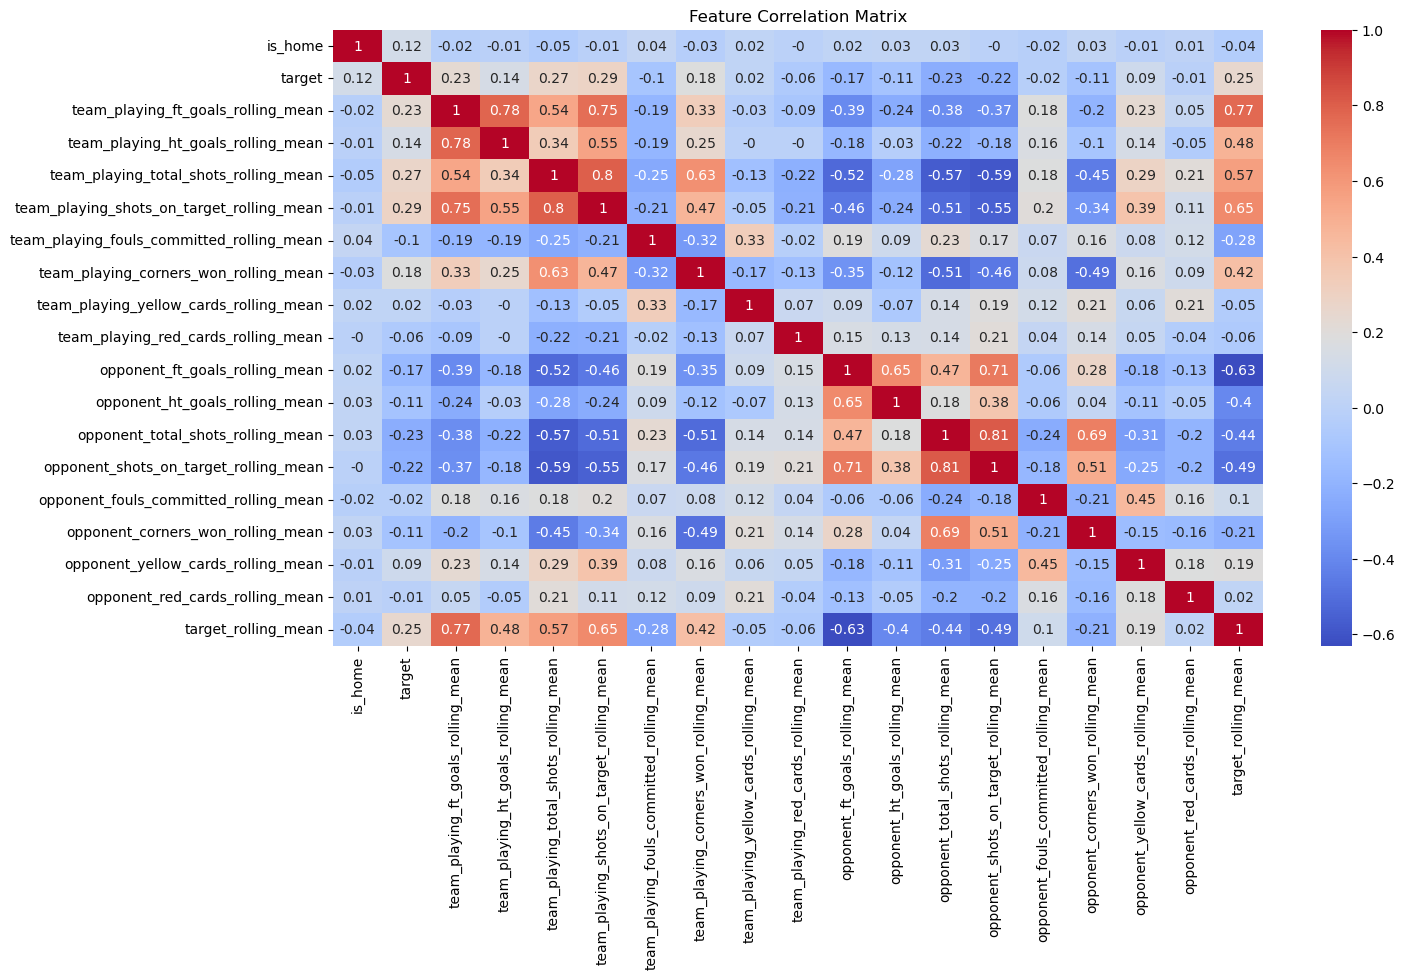

In [908]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date']).corr().round(2), annot=True, cmap = 'coolwarm')
plt.title('Feature Correlation Matrix')


In [909]:
train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date']).columns

Index(['team_playing', 'opponent', 'is_home', 'target', 'Referee',
       'team_playing_ft_goals_rolling_mean',
       'team_playing_ht_goals_rolling_mean',
       'team_playing_total_shots_rolling_mean',
       'team_playing_shots_on_target_rolling_mean',
       'team_playing_fouls_committed_rolling_mean',
       'team_playing_corners_won_rolling_mean',
       'team_playing_yellow_cards_rolling_mean',
       'team_playing_red_cards_rolling_mean', 'opponent_ft_goals_rolling_mean',
       'opponent_ht_goals_rolling_mean', 'opponent_total_shots_rolling_mean',
       'opponent_shots_on_target_rolling_mean',
       'opponent_fouls_committed_rolling_mean',
       'opponent_corners_won_rolling_mean',
       'opponent_yellow_cards_rolling_mean', 'opponent_red_cards_rolling_mean',
       'target_rolling_mean'],
      dtype='object')

In [910]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date', 'target', 'team_playing', 'opponent', 'Referee']))

vif = pd.DataFrame()
vif["Variable"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

vif[vif['VIF']<5]['Variable'].values.tolist()

['is_home',
 'team_playing_ht_goals_rolling_mean',
 'team_playing_total_shots_rolling_mean',
 'team_playing_fouls_committed_rolling_mean',
 'team_playing_corners_won_rolling_mean',
 'team_playing_yellow_cards_rolling_mean',
 'team_playing_red_cards_rolling_mean',
 'opponent_ft_goals_rolling_mean',
 'opponent_ht_goals_rolling_mean',
 'opponent_fouls_committed_rolling_mean',
 'opponent_corners_won_rolling_mean',
 'opponent_yellow_cards_rolling_mean',
 'opponent_red_cards_rolling_mean',
 'target_rolling_mean']

Choosing features. 

1. Features with high correlation to the target.
2. Minimal multicolinerality with the target.


Chosen:
- is_home : low multicolinearaoity and high correlation with target -> 0.12.



In [911]:
# Prep X_train, y_train, X_test and y_test
# For simplicity, only going to use 4 features,

features = ['is_home', # If the team playing is home or not.
            'team_playing_ft_goals_rolling_mean', # full time goals rolling averages
            'team_playing_total_shots_rolling_mean', # rolling averages of total shots taken.
            'team_playing_corners_won_rolling_mean', # rolling averages of total corners won.
            'target_rolling_mean', # rolling averages of prev results.
            'opponent_fouls_committed_rolling_mean' # rolling averages of number of fouls won.
            ]

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']

X_future = future_prediction[features]



X_train.to_csv('data/X_train.csv', index = False)
y_train.to_csv('data/y_train.csv', index = False)

X_test.to_csv('data/X_test.csv', index = False)
y_test.to_csv('data/y_test.csv', index = False)

X_future.to_csv('data/X_future.csv', index = False)


In [918]:
test_df.drop(columns = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)[['team_playing', 'opponent']+features]

,team_playing,opponent,is_home,team_playing_ft_goals_rolling_mean,team_playing_total_shots_rolling_mean,team_playing_corners_won_rolling_mean,target_rolling_mean,opponent_fouls_committed_rolling_mean
0,Everton,West Ham,1,0.8,13.0,4.2,0.0,9.4
1,West Ham,Everton,0,1.0,12.6,3.0,0.2,10.8
2,Tottenham,Crystal Palace,1,2.0,15.0,8.4,0.4,11.4
3,Crystal Palace,Tottenham,0,1.8,11.4,6.4,0.4,10.8
4,Brentford,Chelsea,1,1.2,10.6,4.2,0.2,10.0
5,Chelsea,Brentford,0,1.6,11.8,5.0,0.4,11.2
6,Nott'm Forest,Liverpool,1,1.6,11.8,3.8,0.2,10.8
7,Liverpool,Nott'm Forest,0,3.2,21.4,8.0,0.8,11.6
8,Fulham,Brighton,1,1.6,15.8,8.4,0.4,9.4
9,Brighton,Fulham,0,2.2,15.0,6.8,0.4,11.6
